In [132]:
import numpy as np
import xarray as xr

import matplotlib.patches as patches
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean.cm as cmo
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [133]:
# For this edit, being a petroleum engineering student, I am not as interested in spacial data or spacial packages as much yet
# Statiscal analysis is more aligned with what I may have have to work with
# So I will go ahead and perform a slight exploration with the data
#Load dataset
ds = xr.open_dataset('s1a-iw-ocn-vv-20200913t001819-20200913t001844-034333-03FDDC-001.nc')
ds

<xarray.Dataset>
Dimensions:                   (length: 26, oswAngularBinSize: 1, oswAzSize: 1, oswKxBinSize: 1, oswKyBinSize: 1, oswLag: 1, oswPartitions: 1, oswRaSize: 1, oswWavenumberBinSize: 1, owiAzSize: 167, owiIncSize: 154, owiPolarisation: 2, owiRaSize: 256, rvlAzSize: 233, rvlRaSize: 129, rvlSwath: 3)
Coordinates:
    oswPartitions             (oswAzSize, oswRaSize, oswAngularBinSize, oswWavenumberBinSize) float32 ...
Dimensions without coordinates: length, oswAngularBinSize, oswAzSize, oswKxBinSize, oswKyBinSize, oswLag, oswRaSize, oswWavenumberBinSize, owiAzSize, owiIncSize, owiPolarisation, owiRaSize, rvlAzSize, rvlRaSize, rvlSwath
Data variables:
    oswPolSpec                (oswAzSize, oswRaSize, oswAngularBinSize, oswWavenumberBinSize) float32 ...
    oswPolSpecNV              (oswAzSize, oswRaSize, oswAngularBinSize, oswWavenumberBinSize) float32 ...
    oswQualityCrossSpectraRe  (oswAzSize, oswRaSize, oswAngularBinSize, oswWavenumberBinSize) float32 ...
    oswQualityCrossSpectraIm  (oswAzSize, oswRaSize, oswAngularBinSize, oswWavenumberBinSize) float32 ...
    oswK                      (oswWavenumberBinSize) float32 ...
    oswPhi                    (oswAngularBinSize) float32 ...
    oswAzCutoff               (oswAzSize, oswRaSize) float32 ...
    oswRaCutoff               (oswAzSize, oswRaSize) float32 ...
    oswSpecRes                (oswAzSize, oswRaSize, oswAngularBinSize) float32 ...
    oswLon                    (oswAzSize, oswRaSize) float32 ...
    oswLat                    (oswAzSize, oswRaSize) float32 ...
    oswHs                     (oswAzSize, oswRaSize, oswPartitions) float32 ...
    oswHsNV                   (oswAzSize, oswRaSize, oswPartitions) float32 ...
    oswWl                     (oswAzSize, oswRaSize, oswPartitions) float32 ...
    oswDirmet                 (oswAzSize, oswRaSize, oswPartitions) float32 ...
    oswSnr                    (oswAzSize, oswRaSize) float32 ...
    oswAmbiFac                (oswAzSize, oswRaSize, oswPartitions) float32 ...
    oswIconf                  (oswAzSize, oswRaSize, oswPartitions) float32 ...
    oswLookSeparationTime     (oswAzSize, oswRaSize) float32 ...
    oswNrcs                   (oswAzSize, oswRaSize) float32 ...
    oswInten                  (oswAzSize, oswRaSize) float32 ...
    oswNv                     (oswAzSize, oswRaSize) float32 ...
    oswSkew                   (oswAzSize, oswRaSize) float32 ...
    oswKurt                   (oswAzSize, oswRaSize) float32 ...
    oswWindSpeed              (oswAzSize, oswRaSize) float32 ...
    oswWindDirection          (oswAzSize, oswRaSize) float32 ...
    oswEcmwfWindSpeed         (oswAzSize, oswRaSize) float32 ...
    oswEcmwfWindDirection     (oswAzSize, oswRaSize) float32 ...
    oswWindSeaHs              (oswAzSize, oswRaSize) float32 ...
    oswWaveAge                (oswAzSize, oswRaSize) float32 ...
    oswDepth                  (oswAzSize, oswRaSize) float32 ...
    oswNlWidth                (oswAzSize, oswRaSize) float32 ...
    oswLandFlag               (oswAzSize, oswRaSize) int8 ...
    oswLandCoverage           (oswAzSize, oswRaSize) float32 ...
    oswIncidenceAngle         (oswAzSize, oswRaSize) float32 ...
    oswHeading                (oswAzSize, oswRaSize) float32 ...
    oswGroundRngSize          (oswAzSize, oswRaSize) float32 ...
    oswAziSize                (oswAzSize, oswRaSize) float32 ...
    oswEllipsLength           (oswAzSize, oswRaSize, oswPartitions) float32 ...
    oswEllipsLengthStdDev     (oswAzSize, oswRaSize, oswPartitions) float32 ...
    oswEllipsWidth            (oswAzSize, oswRaSize, oswPartitions) float32 ...
    oswEllipsWidthStdDev      (oswAzSize, oswRaSize, oswPartitions) float32 ...
    oswGroupDir               (oswAzSize, oswRaSize, oswPartitions) float32 ...
    oswQualityFlagPartition   (oswAzSize, oswRaSize, oswPartitions) float32 ...
    oswQualityFlag            (oswAzSize, oswRaSize) float32 ...
    oswTotalHs                (oswAzSize, oswRaSiz

In [134]:
# Choose Data to analyze
all_rad_vel = ds.rvlRadVel

# Select a specific set of Radial velocity depending only on the Azsize
rad_vel = all_rad_vel[:,0,1]

# Select the azimuth size in order to observe its dependencies with radial velocity
azsize = ds.rvlAzSize

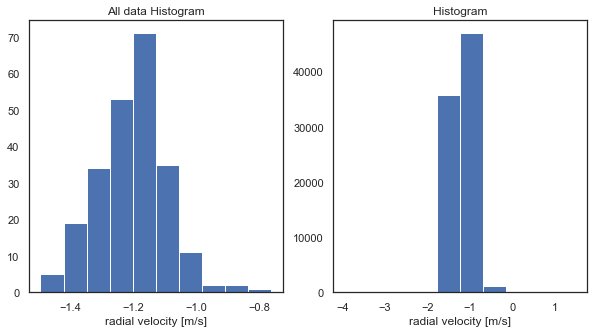

In [193]:
#Comparing the two distrubution
fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.hist(rad_vel)
ax1.set_title('Histogram')
ax1.set_xlabel('radial velocity [m/s]')
ax2 = all_rad_vel.plot()

In [136]:
# The larger set of Data has a wider range but a greater localized distribution
# We'll focus our analyze on the much better distributed set rad_vel and wo=ill later look at why the other is wider

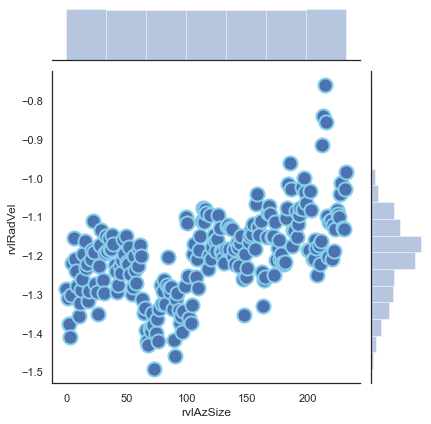

In [205]:
# We can use diferent type of jointplot to look at the data
sns.jointplot(x = azsize, y = rad_vel, kind='scatter', s=200, edgecolor="skyblue", linewidth = 2)

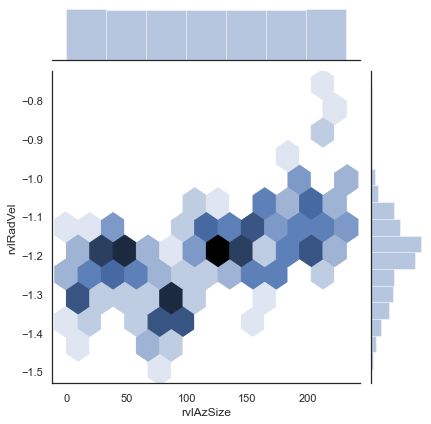

In [206]:
sns.jointplot(x = azsize, y = rad_vel, kind='hex')

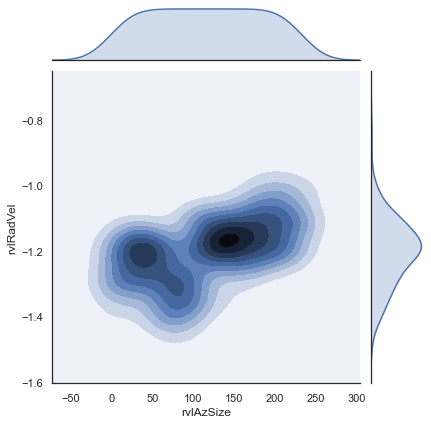

In [207]:
sns.jointplot(x = azsize, y = rad_vel, kind='kde')

In [ ]:
# As we can see in some of those plots. there seems to be a cluster of data at specific point
# It may be interesiting to explore why that is

(array([-2.42678482e-33,  4.92725019e-30, -4.56096176e-27,  2.54889459e-24,
        -9.59922215e-22,  2.57517195e-19, -5.07247726e-17,  7.45329056e-15,
        -8.21814158e-13,  6.78631378e-11, -4.15675170e-09,  1.85395061e-07,
        -5.83764397e-06,  1.23352994e-04, -1.60576670e-03,  1.09313583e-02,
        -2.20511790e-02, -1.31259353e+00]),
 array([1.26452517]))

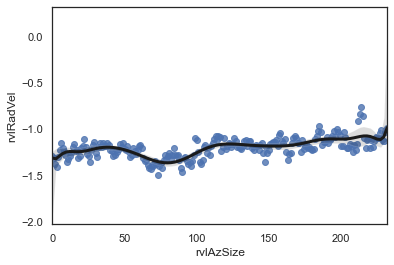

In [244]:
# A closer look at the line fitting plot can allows to us determine what kind of order we can use to predict overall output
# The output below gives us the coefficient as well as the residual error from the fit model
degree = 17
sns.regplot(x = azsize, y = Vel[:,0,1], order = degree, line_kws={'lw': 3, 'color': 'k'})
np.polyfit(x, y, degree, full=True)[0:2]

In [245]:
# Overall the dataset seems interresting. An exploratory analysis can reveal a few things about the dataset
# More statistical analysis may reveal us more about the velocity